
# Cars4U Project

### Background & Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholds in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

## Task 

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

## Objectives

1. Explore and visualize the dataset.
2. Build a linear regression model to predict the prices of used cars.
3. Generate a set of insights and recommendations that will help the business.

## Data Dictionary 

S.No. : Serial Number
Name : Name of the car which includes Brand name and Model name
Location : The location in which the car is being sold or is available for purchase Cities
Year : Manufacturing year of the car
Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
Transmission : The type of transmission used by the car. (Automatic / Manual)
Owner : Type of ownership
Mileage : The standard mileage offered by the car company in kmpl or km/kg
Engine : The displacement volume of the engine in CC.
Power : The maximum power of the engine in bhp.
Seats : The number of seats in the car.
New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

## Outline 
0. Problem
- definition
- questions 
1. EDA: (shape of data: boxplots, pairplots, histograms, heatmaps) 
- univariate 
- bivariate 
2. Pre-processing: 
-datatypes 
- units of measurements 
- missing values 
- outliers 
- feature engineering
3. Model
- linear regression
- stats 
- coefficients 
4. Evaluation 
- performance metrics: RMSE, MAE, Adjusted r-square
- areas for improvements 
5. Recommendations
- strategies for growth 

In [2]:
# import key packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler 
import os # accessing directory structure

In [3]:
# read the csv file 
df = pd.read_csv('used_cars_data.csv')

In [4]:
# overview of the dataframe in rows and columns 
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.') 

There are 7253 rows and 14 columns.


In [5]:
# ascertain datatypes, to change to more appropriate ones esp integers, same as info()

df.dtypes 

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [6]:
# random samples might be better than just the top 10 rows, but set it to the same random sample each time 

np.random.seed(1)
df.sample(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36 Lakh,8.20


### Remove all units 

In [20]:
df['Mileage'] = df['Mileage'].str.split(" ", expand = True)[0]

In [11]:
df['Power'] = df['Power'].str.split(" ", expand = True)[0]

In [12]:
df['New_Price'] = df['New_Price'].str.split(" ", expand = True)[0]

In [15]:
df['Engine'] = df['Engine'].str.split(" ", expand = True)[0]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.0,3626.00,5439.00,7252.0
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


In [17]:
df['Name'].value_counts()

Mahindra XUV500 W8 2WD                              55
Maruti Swift VDI                                    49
Maruti Swift Dzire VDI                              42
Honda City 1.5 S MT                                 39
Maruti Swift VDI BSIV                               37
                                                    ..
Mitsubishi Pajero 2.8 GLX Sports                     1
Honda Amaze VX Diesel                                1
Nissan Teana XL                                      1
Renault Duster 85PS Diesel RxL Optional with Nav     1
Mercedes-Benz S Class 2005 2013 S 500                1
Name: Name, Length: 2041, dtype: int64

#### a lot of variables can be numeric, but are not yet 

In [258]:
# identify columns with most missing values 
df.isnull().sum().sort_values(ascending=False) 

New_Price            6247
Price                1234
Seats                  53
Power                  46
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
S.No.                   0
dtype: int64

#### missing values are concentrated around the prices of both new and old cars 

In [259]:
# different locations might affect old car sales prices 
df.Location.value_counts(ascending=False)

Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64

### general bservations from 10 random rows and actions to be taken 

#### units, datatypes 
Units for Mileage need to be standardized to either km/kg, or kmpl, but values seem consistent.  

Datatype for Seats can be changed to integers from floats. 

Datatypes for Engine/ Power can be changed to integers from objects. 

Datatype for New_Price can be changed to floats from objects. 

Datatypes for Owner_Type, Fuel_Type, and Transmission can be converted from objects to categorical. 

#### missing values 
14 variables seem like quite a lot, some can be dropped: such as S.No.,but others seem to have relationship to prices 

New_Price: close to 86% values missing, thus the Price of old cars cannot be predicted with this variable

Seats, Power and Engine: have overlapping missing values around 46 

Mileage: only 2 missing, so can be filled in with either mean or median 

Others: all present

## column treatments: converting datatypes 

In [260]:
df['Fuel_Type'] = df["Fuel_Type"].astype("category")

In [261]:
df['Transmission'] = df["Transmission"].astype("category")

In [262]:
df['Owner_Type'] = df["Owner_Type"].astype("category")

In [263]:
df['Seats'] = df["Owner_Type"].astype("category")

## column treatments: dropping units 

In [264]:
# identify the columns with non-numerical units 

modify_cols = []
for colname in df.columns[df.dtypes == 'object']:  # loop through string columns
    if df[colname].str.endswith('Lakh').any():  
        modify_cols.append(colname)
    elif df[colname].str.endswith('CC').any():  
        modify_cols.append(colname)
    elif df[colname].str.endswith('bhp').any():  
        modify_cols.append(colname)
    elif df[colname].str.endswith('kmpl').any():  
        modify_cols.append(colname)
        
print(modify_cols)

['Mileage', 'Engine', 'Power', 'New_Price']


In [265]:
# drop the units for numerical columns 

def obj_to_num(obj_val):
    
    if isinstance(obj_val, str) and obj_val.find('null') == -1:
        return float(obj_val.replace("kmpl", "").replace("Lakh", "").replace("bhp", "")
                     .replace("CC", "").replace("km/kg", "").replace("Cr", "")) 
    
    else: 
        return np.nan

for colname in modify_cols:
    df[colname] = df[colname].apply(obj_to_num)
    
df[modify_cols]

,Mileage,Engine,Power,New_Price
0,26.60,998.0,58.16,NaN
1,19.67,1582.0,126.20,NaN
2,18.20,1199.0,88.70,8.61
3,20.77,1248.0,88.76,NaN
4,15.20,1968.0,140.80,NaN
...,...,...,...,...
7248,20.54,1598.0,103.60,NaN
7249,17.21,1197.0,103.60,NaN
7250,23.08,1461.0,63.10,NaN
7251,17.20,1197.0,103.60,NaN


In [266]:
df.dtypes

S.No.                   int64
Name                   object
Location               object
Year                    int64
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage               float64
Engine                float64
Power                 float64
Seats                category
New_Price             float64
Price                 float64
dtype: object

In [267]:
df.describe()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,New_Price,Price
count,7253.000000,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,1006.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,19.894324,9.479468
std,2093.905084,3.254421,8.442772e+04,4.562197,595.285137,53.493553,19.813947,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,1.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,7.635000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,11.270000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,23.640000,9.950000
max,7252.000000,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,99.920000,160.000000


### there seems to be extreme values for engine, power, new price and price 

## plots to show trends 

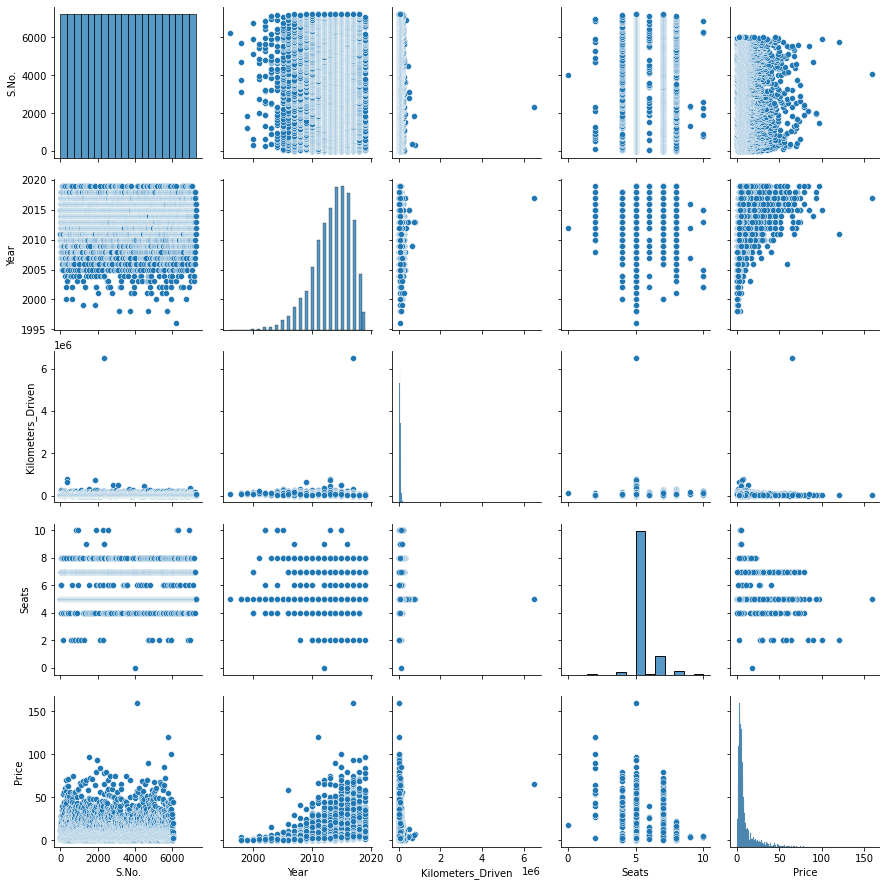

In [30]:
sns.pairplot(data=df)


In [268]:
# separate numeric and categorical variables to show on graphs 

df_num = df[['Kilometers_Driven','Mileage','Engine','Power','New_Price','Price']]
df_cat = df[['Fuel_Type','Transmission','Owner_Type','Seats','Location']]

### distributions for all numeric variables 

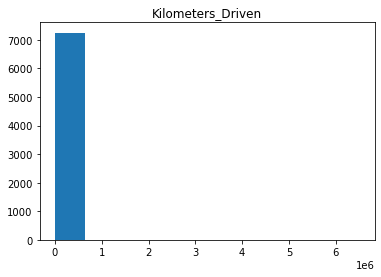

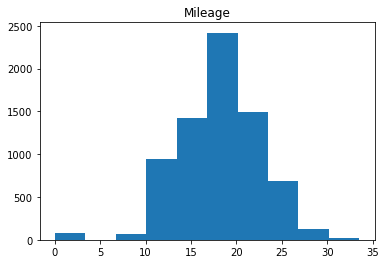

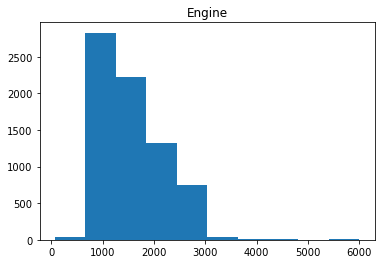

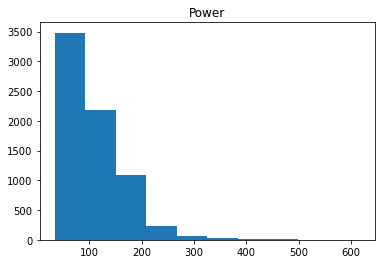

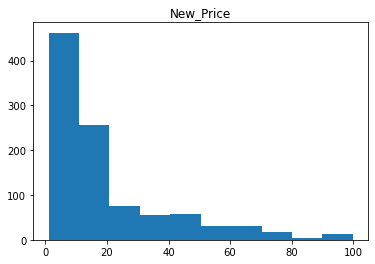

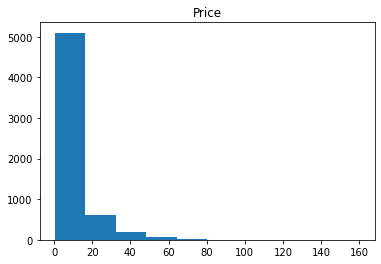

In [269]:
# histograms for numeric variables 

for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

#### only mileage is normally distributed, while the rest are highly skewed, kilometers is not only skewed but also not scaled, needs normalization 

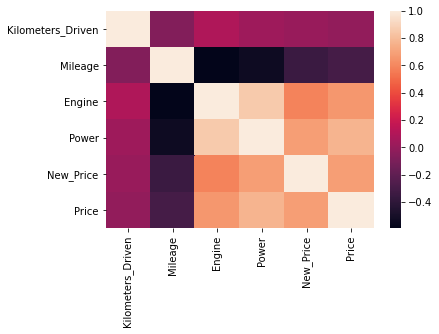

In [270]:
# heatmap for numeric variables to show correlation 

df_num.corr()
sns.heatmap(df_num.corr());

#### mileage seems to influence on prices the most, either old or new cars, mileage has high collinearity on power and engine, thus should be dropped to prevent influence on regression later 

### distribution for all categorical values 

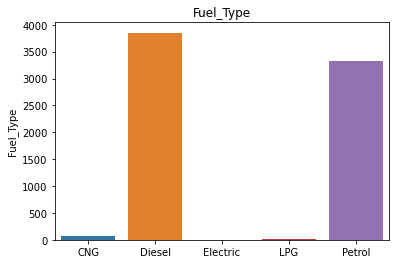

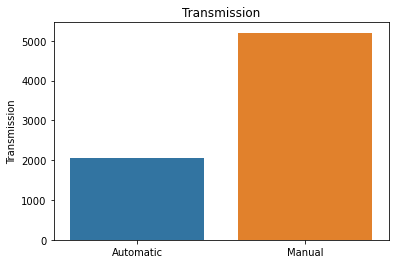

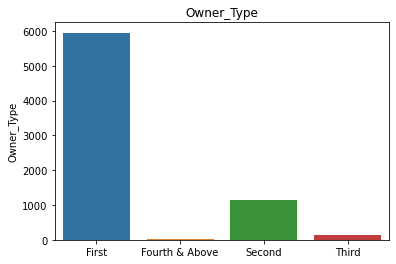

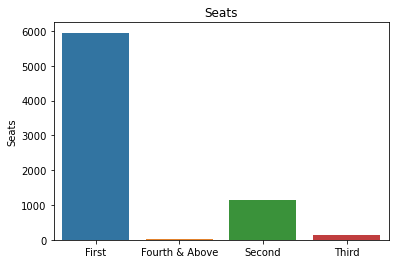

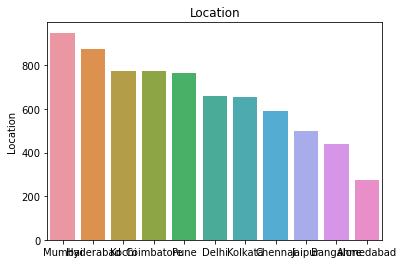

In [271]:
# bar plots for categorical variables 

for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

## missing values treatment

In [272]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                   0
New_Price            6247
Price                1234
dtype: int64

#### loads of missing values for prices, and high skewness

In [273]:
df = df[df['Price'].notna()]
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,First,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,First,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,First,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,First,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,Second,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,First,7.88,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,First,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,Second,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,First,NaN,2.65


In [274]:
df.isnull().sum().sort_values(ascending = False)

New_Price            5195
Power                 143
Engine                 36
Mileage                 2
Price                   0
Seats                   0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
S.No.                   0
dtype: int64

## dropping irrelevant columns 

In [275]:
df.drop(columns=['New_Price','Name','S.No.'], axis=1, inplace=True)

In [276]:
df.drop(columns=['Year'], axis=1, inplace=True)

In [277]:
df.drop(columns=['Location'], axis=1, inplace=True)

In [278]:
df

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,72000,CNG,Manual,First,26.60,998.0,58.16,First,1.75
1,41000,Diesel,Manual,First,19.67,1582.0,126.20,First,12.50
2,46000,Petrol,Manual,First,18.20,1199.0,88.70,First,4.50
3,87000,Diesel,Manual,First,20.77,1248.0,88.76,First,6.00
4,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,Second,17.74
...,...,...,...,...,...,...,...,...,...
6014,27365,Diesel,Manual,First,28.40,1248.0,74.00,First,4.75
6015,100000,Diesel,Manual,First,24.40,1120.0,71.00,First,4.00
6016,55000,Diesel,Manual,Second,14.00,2498.0,112.00,Second,2.90
6017,46000,Petrol,Manual,First,18.90,998.0,67.10,First,2.65


## scaling and normalization 

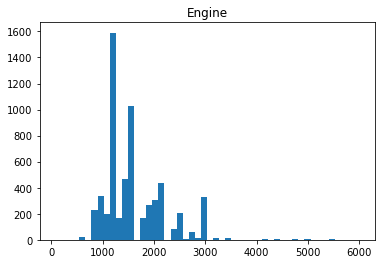

0


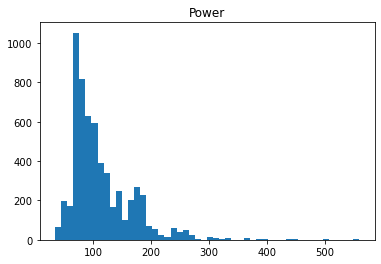

0


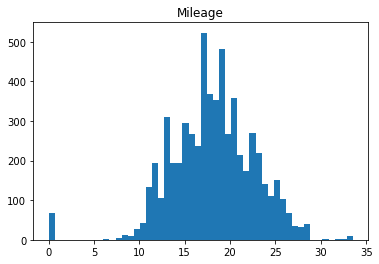

68


In [279]:
cols_to_log = ['Engine', 'Power','Mileage']
for colname in cols_to_log:
    plt.hist(df[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(df[colname] <= 0))

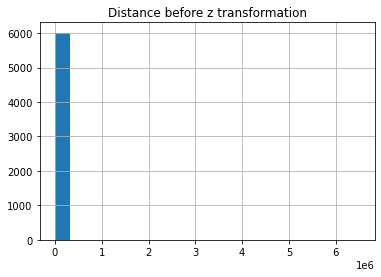

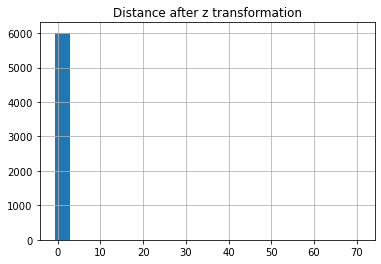

In [280]:
# scaling for kilometers_drive 

from sklearn.preprocessing import StandardScaler, MinMaxScaler

std_scaler = StandardScaler()

df['Kilometers_Driven'].hist(bins=20)
plt.title('Distance before z transformation')
plt.show()

df['Kilo_z_std'] = std_scaler.fit_transform(df[['Kilometers_Driven']])
df['Kilo_z_std'].hist(bins=20)
plt.title('Distance after z transformation')
plt.show()
# exact same shape since it's a linear transformation.
df.drop(['Kilometers_Driven'], axis=1, inplace=True)

## outlier treatments 

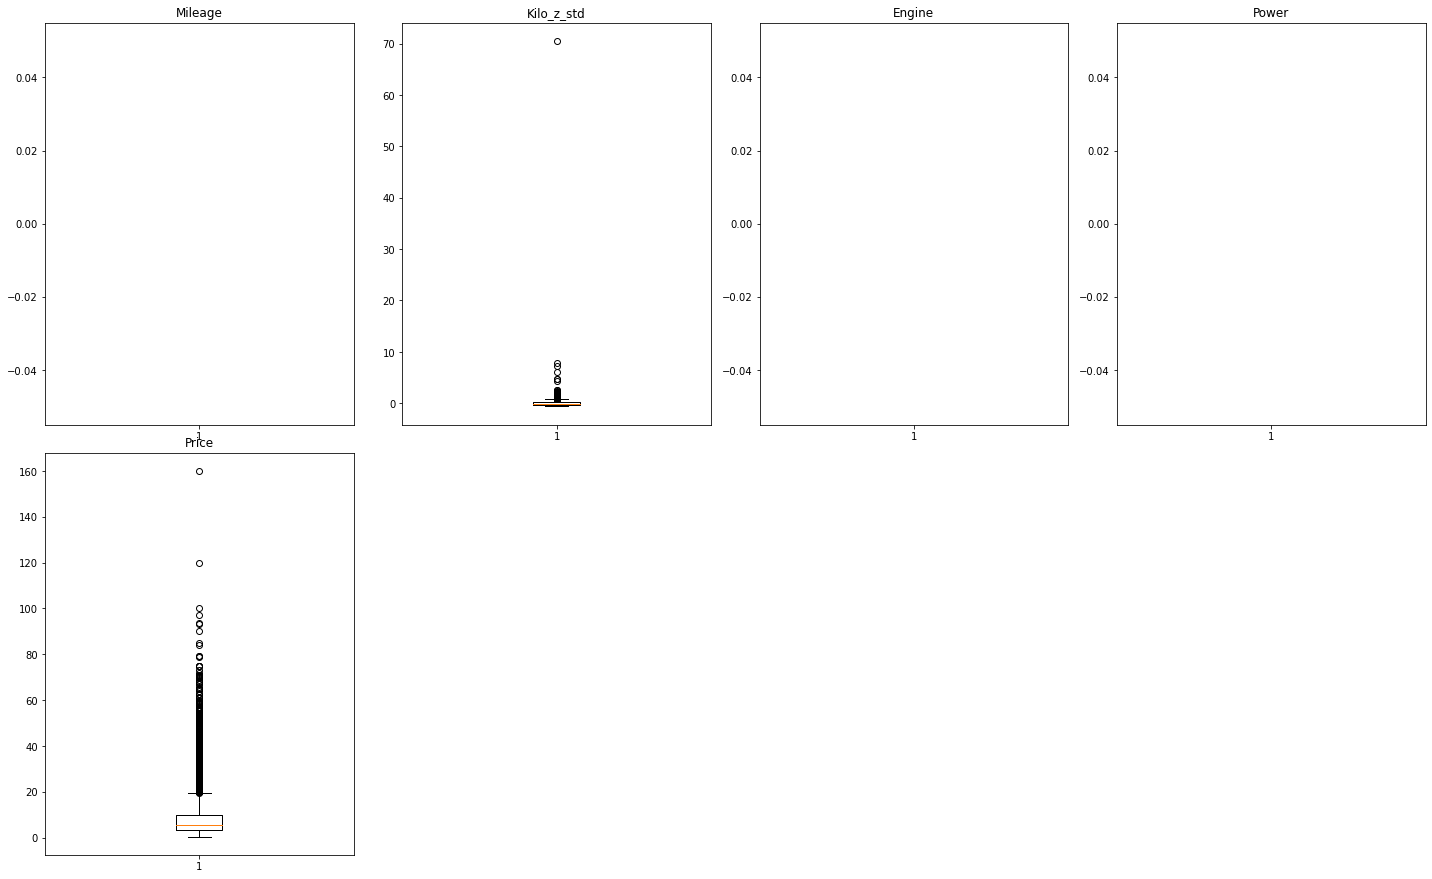

In [281]:
# boxplots of numerical variables to show outliers 

plt.figure(figsize=(20,30))

for i, variable in enumerate(df[['Mileage','Kilo_z_std','Engine','Power','Price']]):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [282]:
# flooring and capping

def treat_outliers(df,col):
    
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):

    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

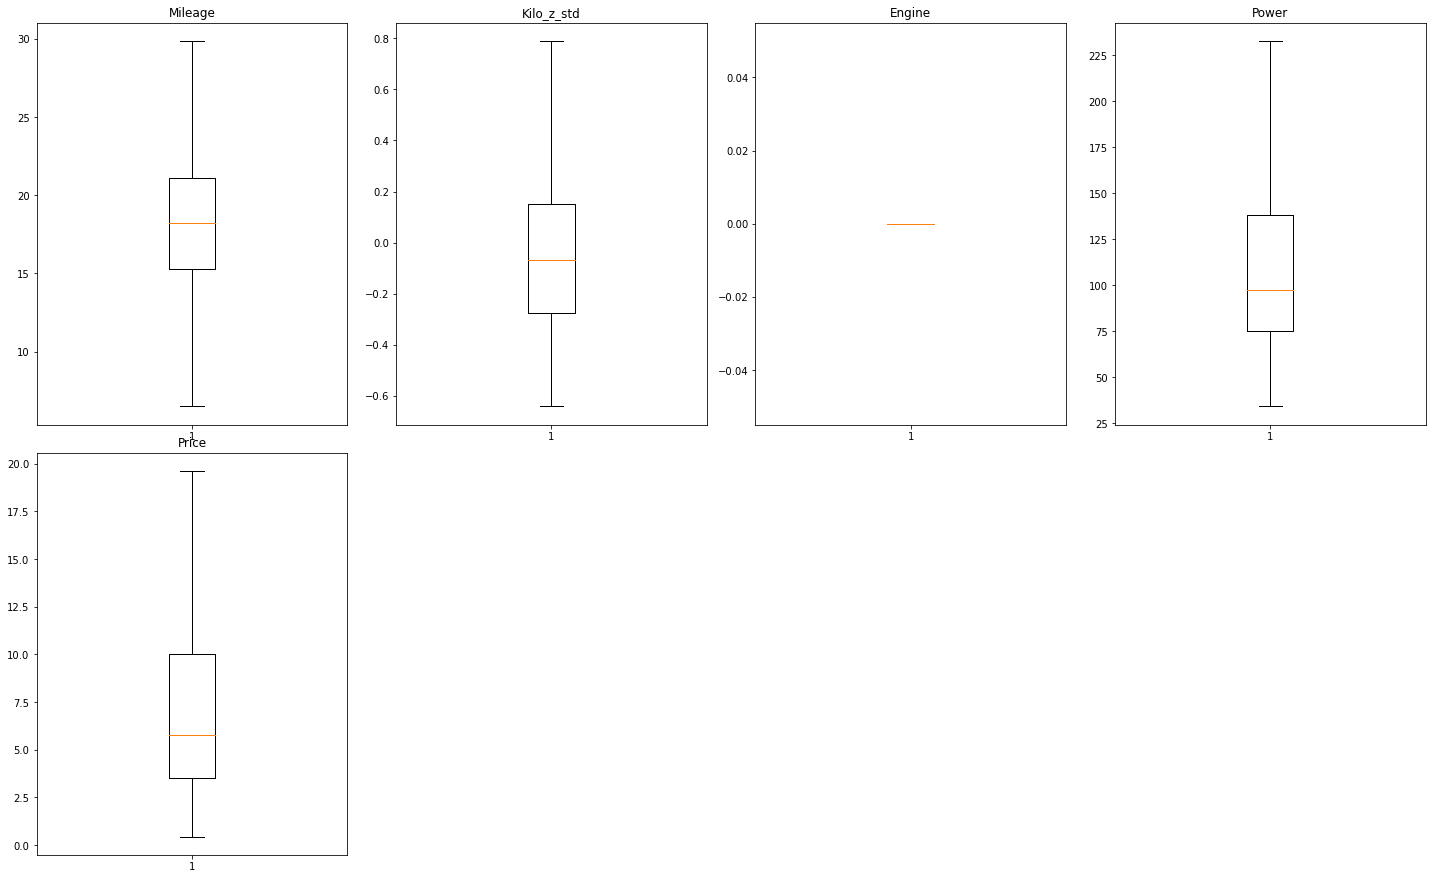

In [322]:
# new boxplots after treatment 

numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df,df[['Mileage','Kilo_z_std','Engine','Power','Price']])

plt.figure(figsize=(20,30))

for i, variable in enumerate(df[['Mileage','Kilo_z_std','Engine','Power','Price']]):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

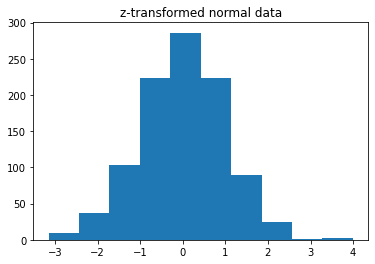

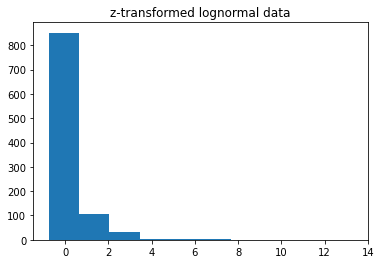

In [285]:
# outlier detection with z-score 

def z_transform(x):
    return (x - np.mean(x)) / np.std(x)

np.random.seed(1)
x1 = np.random.normal(size=1000)
x2 = np.random.lognormal(size=1000)


plt.hist(z_transform(x1))
plt.title('z-transformed normal data')
plt.show()


plt.hist(z_transform(x2))
plt.title('z-transformed lognormal data')
plt.show()


In [286]:
# outlier detection with iqr 

def frac_outside_1pt5_IQR(x):
    length = 1.5 * np.diff(np.quantile(x, [.25, .75]))
    return np.mean(np.abs(x - np.median(x)) > length)

print(frac_outside_1pt5_IQR(x1))
print(frac_outside_1pt5_IQR(x2))

0.05
0.132


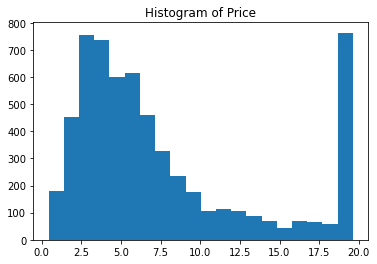

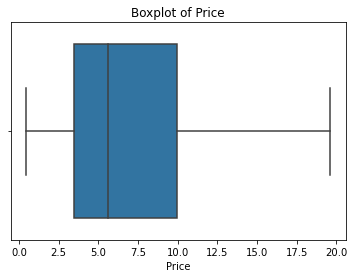

In [287]:
# applying to the variable Price

plt.hist(df['Price'], 20)
plt.title('Histogram of Price')
plt.show()

sns.boxplot(df['Price'])
plt.title('Boxplot of Price')
plt.show()

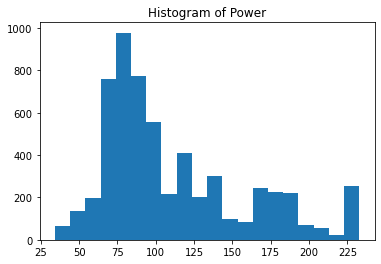

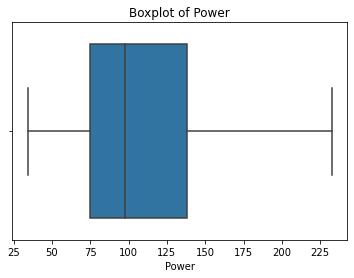

In [288]:
plt.hist(df["Power"], 20)
plt.title('Histogram of Power')
plt.show()

sns.boxplot(df['Power'])
plt.title('Boxplot of Power')
plt.show()

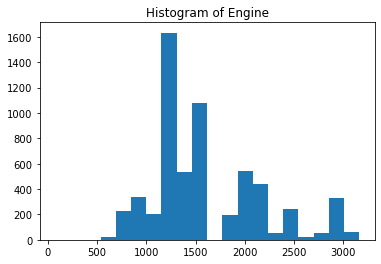

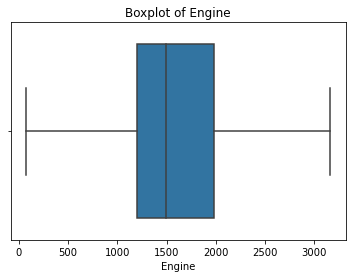

In [289]:
plt.hist(df['Engine'], 20)
plt.title('Histogram of Engine')
plt.show()

sns.boxplot(df['Engine'])
plt.title('Boxplot of Engine')
plt.show()

## encoding categorical values 

In [290]:
df['Engine'] = pd.get_dummies(df['Engine'], drop_first=True)

In [291]:
df['Fuel_Type'] = pd.get_dummies(df['Fuel_Type'], drop_first=True)

In [292]:
df['Transmission'] = pd.get_dummies(df['Transmission'], drop_first=True)

In [293]:
df['Owner_Type'] = pd.get_dummies(df['Owner_Type'], drop_first=True)

In [294]:
df['Seats'] = pd.get_dummies(df['Seats'], drop_first=True)

## Training the model 

In [295]:
df = df.dropna(how='any')

In [296]:
df

,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Kilo_z_std
0,0,1,0,26.60,0,58.16,0,1.75,0.145315
1,1,1,0,19.67,0,126.20,0,12.50,-0.194369
2,0,1,0,18.20,0,88.70,0,4.50,-0.139581
3,1,1,0,20.77,0,88.76,0,6.00,0.309678
4,1,0,0,15.20,0,140.80,0,17.74,-0.197985
...,...,...,...,...,...,...,...,...,...
6014,1,1,0,28.40,0,74.00,0,4.75,-0.343775
6015,1,1,0,24.40,0,71.00,0,4.00,0.452126
6016,1,1,0,14.00,0,112.00,0,2.90,-0.040963
6017,0,1,0,18.90,0,67.10,0,2.65,-0.139581


In [310]:
# split the dataset 

Y = df['Price']
X = df.drop(columns = {'Price'})

In [311]:
#splitting the data in 70:30 ratio of train to test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=3)

In [315]:
#intialise the model to fit it on the train data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [314]:
train_test_split(X, Y, test_size=0.3, random_state=3)

[      Fuel_Type  Transmission  Owner_Type  Mileage  Engine   Power  Seats  \
 218           0             0           0    14.30       0  103.52      0   
 5133          0             1           0    17.57       0   88.70      0   
 1080          0             1           0    17.57       0   88.70      0   
 2555          1             1           0    25.80       0   98.60      0   
 2745          1             1           0    24.30       0   88.50      0   
 ...         ...           ...         ...      ...     ...     ...    ...   
 814           1             1           0    13.10       0   75.00      0   
 997           1             0           0    26.59       0   74.00      0   
 1712          0             1           0    18.50       0   85.80      0   
 3407          1             0           0    16.00       0  140.00      0   
 1733          0             1           0    18.60       0   81.86      0   
 
       Kilo_z_std  
 218    -0.528575  
 5133   -0.347775  
 1

In [318]:
#R-square score of the fitted training data

print('The coefficient of determination R^2 of the prediction on Train set is', regression_model.score(X_train, y_train))

The coefficient of determination R^2 of the prediction on Train set is 0.7724451689970643


In [301]:
#R-square function for the testing data

def r_squared(model, X, y):
    y_mean = y_train.mean()
    SST = ((y_train - y_mean)**2).sum()
    SSE = ((y_train - regression_model.predict(X_train))**2).sum()
    r_square = 1 - SSE/SST
    return SSE, SST, r_square
    
SSE, SST, r_square = r_squared(regression_model, X_train, y_train)
print("SSE: ", SSE)
print("SST: ", SST)
print("r_square: ", r_square)

SSE:  31823.34053777868
SST:  139939.23223829968
r_square:  0.7725917169276207


In [319]:
print('The coefficient of determination R^2 of the prediction on Test set is',regression_model.score(X_test, y_test))

The coefficient of determination R^2 of the prediction on Test set is 0.7622245548980386


In [306]:
print("The Root Mean Square Error (RMSE) of the model for testing set is",np.sqrt(mean_squared_error(y_test,regression_model.predict(X_test))))

The Root Mean Square Error (RMSE) of the model for testing set is 2.7368759979430313


In [317]:
print("The Root Mean Square Error (RMSE) of the model for traning set is",np.sqrt(mean_squared_error(y_train,regression_model.predict(X_train))))

The Root Mean Square Error (RMSE) of the model for traning set is 2.7404801507653658


In [320]:
a = regression_model.coef_
coeff_data = pd.DataFrame()
coeff_data['Coefs'] = regression_model.coef_
coeff_data['Feature'] = X_train.columns
coeff_data = coeff_data.append({'Coefs': regression_model.intercept_, 'Feature': "Intercept"}, ignore_index = True)
coeff_data

,Coefs,Feature
0,3.147420,Fuel_Type
1,-2.088791,Transmission
2,-1.983280,Owner_Type
3,-0.058934,Mileage
4,0.696453,Engine
5,0.073633,Power
6,-1.983280,Seats
7,-4.255369,Kilo_z_std
8,0.324603,Intercept


In [321]:
Equation = "Price ="
print(Equation, end='\t')
for i in range(0,9):
    if(i!=8):
        print("(",coeff_data.iloc[i].Coefs,")", "*", coeff_data.iloc[i].Feature, "+", end = '  ')
    else:
        print(coeff_data.iloc[i].Coefs)

Price =	( 3.1474199320447926 ) * Fuel_Type +  ( -2.088791187566567 ) * Transmission +  ( -1.9832800999833022 ) * Owner_Type +  ( -0.05893370319572878 ) * Mileage +  ( 0.6964533533990623 ) * Engine +  ( 0.07363267965164573 ) * Power +  ( -1.983280099983297 ) * Seats +  ( -4.255369422254433 ) * Kilo_z_std +  0.32460342655626917


### Observations from model:

- R^2 value is 0.772 on the training set (and 0.762 on the test set) which means that in this model independent variables are able to explain 77.2% of variances in dependent variable. Largely satisfactory, but accuracy could be improved further. 
- The training and testing RMSE are and 2.74, and 2.73 respectively, and both scores are comparable. Hence, the model is a good fit.

## Conclusion and suggestions: 

The quality of the engine might be determinant in the price of second hand cars, thus effort should be put in to maintain the quality of the engines and collect old cars with good engine conditons. Mileage is almost perfectly inversely correlated with price, showing that the lower the mileage, the higher price. Therefore, it can be seen that the condition and performance of the car is the main concern when choosing second hand cars. 